### Uncertainty band for ROC curve with Wilson interval

In [1]:
import numpy as np
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

### Generate a random ROC curve

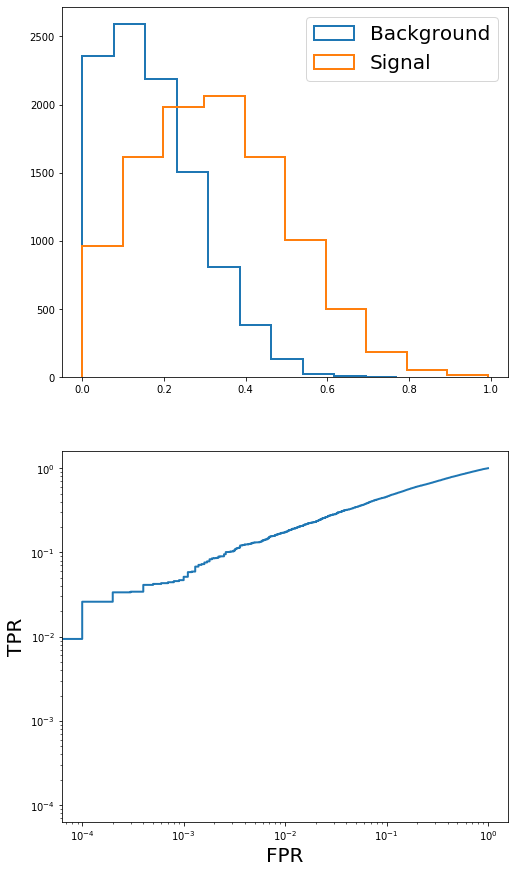

In [69]:
size = int(1e4)
label = np.concatenate((np.ones(size), np.zeros(size)))

def gen_clipped_gauss(mean, std, size):
    pred = np.random.normal(mean, std, int(size*1e3))
    pred = pred[(pred < 1.0) & (pred > 0.0)]
    pred = np.random.choice(pred, size)
    return pred

pred_sig = gen_clipped_gauss(0.3, 0.2, size)
pred_bkg = gen_clipped_gauss(0.1, 0.16, size)
pred = np.concatenate((pred_sig, pred_bkg))

fpr, tpr, threshold = roc_curve(label, pred)

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(8,15))
ax0.hist(pred_bkg, linewidth=2, label='Background', histtype='step')
ax0.hist(pred_sig, linewidth=2, label='Signal', histtype='step')
ax0.legend(loc='best', fontsize=20)

ax1.plot(fpr, tpr, linewidth=2)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('FPR', fontsize=20)
ax1.set_ylabel('TPR', fontsize=20)
fig.show()

### Compute Wilson interval

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


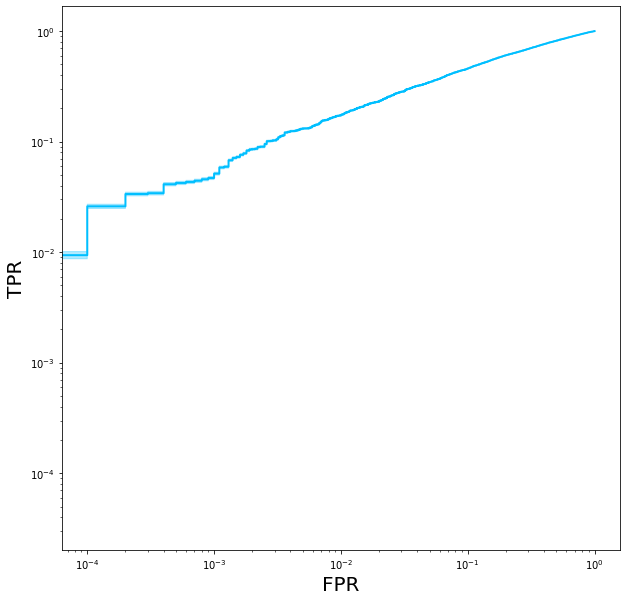

In [77]:
# https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval#Wilson_score_interval_with_continuity_correction
def upper_wilson(p, n, z=1):
    A = 2 * n * p
    B = np.power(z, 2)
    C = z * np.sqrt(np.power(z, 2) - 1./n + 4 * n * p * (1 - p) - (4 * p - 2)) + 1
    D = 2 * (n + np.power(z, 2))
    ratio = (A + B + C)/D
    ratio = np.where(ratio < 1, ratio, 1)
    return ratio
def lower_wilson(p, n, z=1):
    A = 2 * n * p
    B = np.power(z, 2)
    C = z * np.sqrt(np.power(z, 2) - 1./n + 4 * n * p * (1 - p) + (4 * p - 2)) + 1
    D = 2 * (n + np.power(z, 2))
    ratio = (A + B - C)/D
    ratio = np.where(ratio > 0, ratio, 0)
    return ratio

upper_tpr = upper_wilson(tpr, 2*size)
lower_tpr = lower_wilson(tpr, 2*size)

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(fpr, tpr, linewidth=2, color='deepskyblue')
ax.fill_between(fpr, lower_tpr, upper_tpr, color='deepskyblue', alpha=0.3)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('FPR', fontsize=20)
ax.set_ylabel('TPR', fontsize=20)
fig.show()